Aim: Program to implement text classification using Support vector machine.

In [ ]:
import nltk # Natural language toolkit
import pandas as pd

In [ ]:
nltk.download_shell()#he NLTK corpus and module downloader. 
                     #This module defines several interfaces which can be used to download corpora, models, and other data packages that can be used with NLTK.

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> 1
Command '1' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ

In [ ]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [ ]:
messages=[line.rstrip() for line in open('/content/sample_data/SMSSpamCollection')]

In [ ]:
print(len(messages))

5574


In [ ]:

messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
for mess_no,message in enumerate(messages[:10]):
  print(mess_no,message)
  print('\n')


0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [ ]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
import pandas as pd

In [ ]:
messages=pd.read_csv('/content/sample_data/SMSSpamCollection',sep='\t',
                     names=['label','message'])

In [ ]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
##classification tasks needs numerical features.so converting strings into vector format using bag of words
#1) function to split words from a sentence into list
#2) Remove stopwords (a,an,the etc)
# To explore bag of words,please refer the site https://machinelearningmastery.com/gentle-introduction-bag-words-model/#:~:text=A%20bag%2Dof%2Dwords%20model%2C%20or%20BoW%20for%20short,for%20extracting%20features%20from%20documents.

import string

#Sample code for removing punctuations and stopwords

In [ ]:
#removing punctuations
mess="sample message! Notice: it has punctuation."

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
nopunc=[c for c in mess if c not in string.punctuation]

In [ ]:
nopunc

['s',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [ ]:
nopunc=''.join(nopunc)

In [ ]:
nopunc

'sample message Notice it has punctuation'

In [ ]:
#Removing stopwords
#for this,we need to download stopwords corpus
from nltk.corpus import stopwords

In [ ]:
nopunc.split()

['sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [ ]:
clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words("english") ]

In [ ]:
clean_mess

['sample', 'message', 'Notice', 'punctuation']

In [ ]:
#Apply the above function in our actual dataset
def text_process(mess):
  """
  1.Remove punc
  2.Remove stop words
  3.return list of clean text words
  """
  nopunc=[char for char in mess if char not in string.punctuation]
  nopunc="".join(nopunc)
  return[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#Tockenize (using above two functions ie cleaned version of words)
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [ ]:
#convertig tokens into vectors so that our machine learning models get understand
from sklearn.feature_extraction.text import CountVectorizer

CountVectorizer is a great tool provided by the scikit-learn library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample.

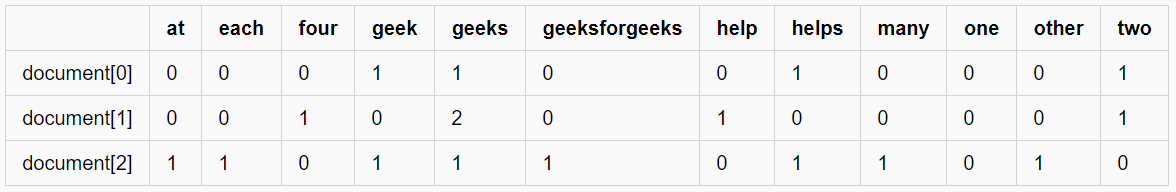

In [ ]:
bow_transformer=CountVectorizer(analyzer=text_process).fit(messages['message'])

In [ ]:
print(len(bow_transformer.vocabulary_))

11425


In [ ]:

mess4=messages['message'][6]

In [ ]:
print(mess4)

Even my brother is not like to speak with me. They treat me like aids patent.


In [ ]:
bow4=bow_transformer.transform([mess4])

In [ ]:
print(bow4)

  (0, 1802)	1
  (0, 4590)	1
  (0, 5193)	1
  (0, 7800)	2
  (0, 8761)	1
  (0, 9971)	1
  (0, 10629)	1


In [ ]:
bow_transformer.get_feature_names()[7800]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


'like'

In [ ]:
#apply this tranformation for the whole message column in the dataset
messages_bow=bow_transformer.transform(messages['message'])

In [ ]:
print('shape of Sparse Matrix:',messages_bow.shape)

shape of Sparse Matrix: (5572, 11425)


In [ ]:
#Check how many nonzero occurences
messages_bow.nnz

50548

TERM FREQUENCY-INVERSE DOCUMENT FREQUENCY


In [ ]:
#Given a corpus D, a term ti and a document dj ∈ D, we denote the number of occurrences of ti in dj by tfij. This is referred as the term frequency.
#The inverse document frequency for a term ti is defined as
#where ∣ D ∣ is the number of documents in our corpus, and ∣ {d : ti ∈ d} ∣ is the number of documents in which the term appears. 
#If the term ti appears in every document of the corpus, idfi is equal to 0. The fewer documents the term ti appears in, the higher the idfi value.
#difference between TF And DF

# TF is frequency counter for a term t in document d.
# DF is the count of occurrences of term t in the document set N. 
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
tfidf_transformer=TfidfTransformer().fit(messages_bow)

In [ ]:
#see an example
tfidf4=tfidf_transformer.transform(bow4)

In [ ]:
print(tfidf4)

  (0, 10629)	0.3352766696931058
  (0, 9971)	0.3268691780062757
  (0, 8761)	0.43700993321905807
  (0, 7800)	0.41453906826037096
  (0, 5193)	0.33843411088434017
  (0, 4590)	0.43700993321905807
  (0, 1802)	0.3352766696931058


In [ ]:
#converting the whole bag of words into tfidf
messages_tfidf=tfidf_transformer.transform(messages_bow)

In [ ]:
from sklearn import model_selection, naive_bayes, svm

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
spam_detect_model=MultinomialNB().fit(messages_tfidf,messages['label'])

In [ ]:
all_pred=spam_detect_model.predict(messages_tfidf)

In [ ]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
msg_train,msg_test,label_train,label_test=train_test_split(messages['message'],messages['label'],test_size=.3)

In [ ]:
spam_detect_model=MultinomialNB().fit(messages_tfidf,messages['label'])

In [ ]:
predict=spam_detect_model.predict(messages_tfidf)

In [ ]:
from sklearn.metrics import classification_report
print (classification_report(messages['label'], predict))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



TRAIN TEST Split


In [ ]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)



#Creating a Data Pipeline
Let's run our model again and then predict off the test set. We will use SciKit Learn's pipeline capabilities to store a pipeline of workflow. This will allow us to set up all the transformations that we will do to the data for future use. Let's see an example of how it works:

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

NameError: ignored

Now we can directly pass message text data and the pipeline will do our pre-processing for us! We can treat it as a model/estimator API:

In [ ]:
pipeline.fit(msg_train,label_train)

NameError: ignored

In [ ]:
predictions = pipeline.predict(msg_test)

In [ ]:
print(classification_report(predictions,label_test))

SVM CLASSIFIER

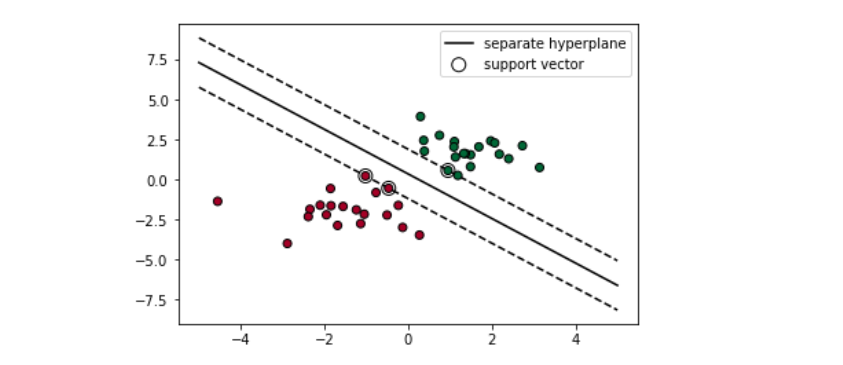

SVM address non-linearly separable cases by introducing two concepts: Soft Margin and Kernel Tricks.

Soft Margin: try to find a line to separate, but tolerate one or few misclassified dots (e.g. the dots circled in red)

Kernel Trick: try to find a non-linear decision boundary

different kernels: Linear,polynomial,radial basis function

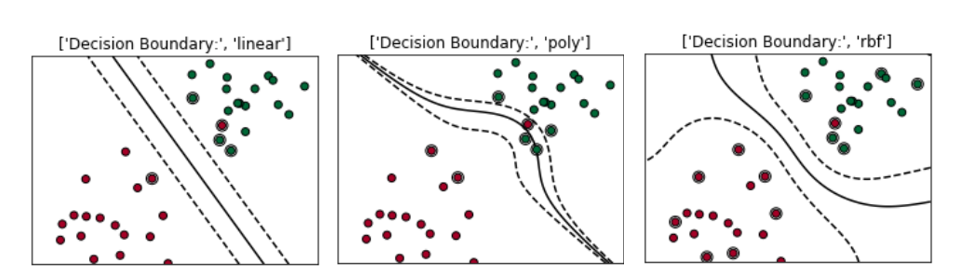

In [ ]:
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [ ]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
pipeline1 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto'))  # train on TF-IDF vectors w/ Naive Bayes classifier
])
                



In [ ]:
pipeline1.fit(msg_train,label_train)

In [ ]:
predictions1 = pipeline1.predict(msg_test)

In [ ]:
print(classification_report(predictions1,label_test))